# Estudo visualizando relações entre dados quantitativos
# Gorjetas de um restaurante

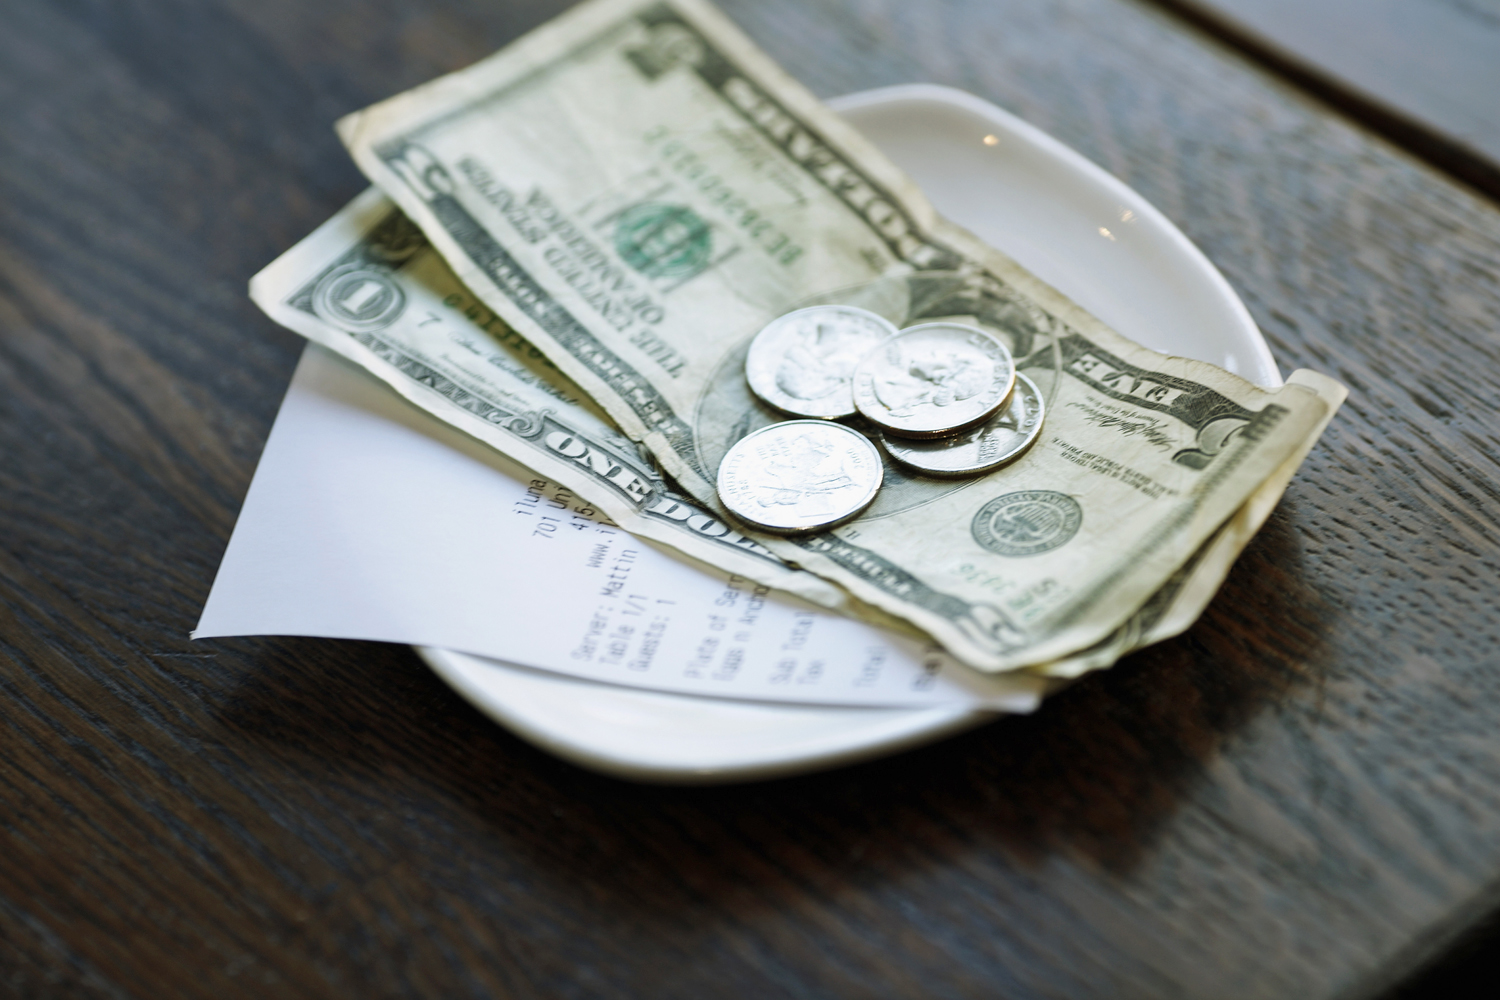

Contexto.

Na análise de dados, é importante descobrir como variáveis quantitativas se relacionam entre si, encontrando tendências e exceções, aumentando a compreensão dos dados. Essa tarefa é simplificada através de técnicas de visualização de dados.

Adotaremos o uso de gráficos de dispersão e gráfico de bolhas.
Temos como objetivo:
- Compreender a correlação entre variáveis quantitativa;
- Aprender a criar e a modificar gráficos de dispersão e bolhas com seaborn;

#### Correlação com gráfico de dispersão e retas de regressão
Ao analisar uma variável quantitativa de um conjunto de dados, é útil conhecer a sua distribuição.
Muitos conjuntos de dados possuem mais de uma variável quantitativa. Nesses casos, muitas vezes será interessante descobrir se essas variáveis possuem alguma relação entre si.

Para esta análise iremos explorar um conjunto de dados reais de gorjetas em um restaurante.

In [5]:
# importando bibliotecas e estilo de visualização.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="darkgrid")

In [6]:
# dados TIPS (gorjetas) carregado direto do seaborn.
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
# renomeando colunas para melhor leitura do público/usuário.
tips.columns=['total_conta', 'gorjeta', 'sexo', 'fumante', 'dia', 'refeição', 'pessoas']
tips

,total_conta,gorjeta,sexo,fumante,dia,refeição,pessoas
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Questão: O dono do restaurante deseja saber se quanto maior o valor da conta maior será o valor da gorjeta.
Adotaremos o gráfico de dispersão scatterplot.

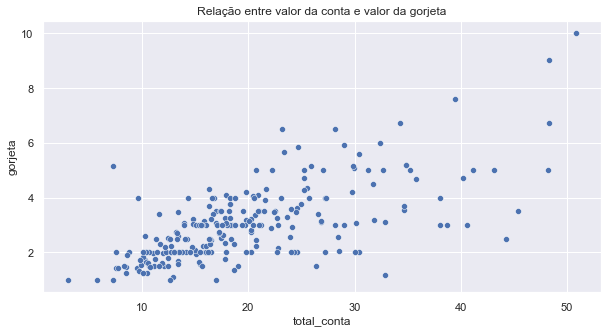

In [16]:
plt.figure(figsize=(10,5))
plt.title('Relação entre valor da conta e valor da gorjeta')
sns.scatterplot(x='total_conta', y='gorjeta', data=tips)
plt.show()

Analisando de forma geral, o valor da conta influencia o valor da gorjeta, não levando em conta outros fatores tipo a forma de atendimento, simpatia, humor do cliente, qualidade da comida e outro motivos que podem afetar os dados.

Conclui-se que há uma tendência estatística entre as duas variáveis, há uma correlação positiva.

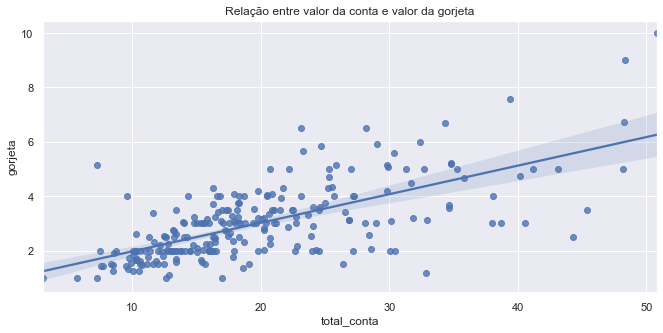

In [18]:
# Aplicando reta de regressão para verificar melhor a correlação dos dados.
plt.figure(figsize=(11,5))
plt.title('Relação entre valor da conta e valor da gorjeta')
sns.regplot(x='total_conta', y='gorjeta', data=tips)
plt.show()

A reta de regressão mostra de forma mais percpetível a correlação positiva entre as duas variáveis analisadas.

## Visualização para mais variáveis
- Representar variáveis categórias
- Representar mais de duas variáveis quantitativas

Questão: O dono do restaurante deseja saber se essa relação se mantém para as gorjetas dadas somente por mulheres ou somente por homens, e se existe algum dos sexos que seja mais generoso nas gorjetas.

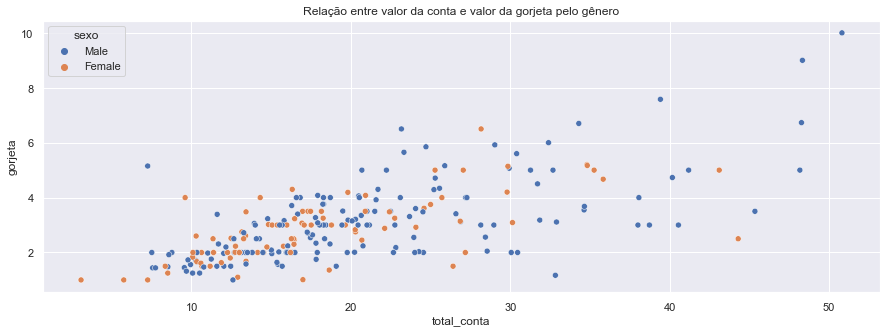

In [21]:
plt.figure(figsize=(15,5))
plt.title('Relação entre valor da conta e valor da gorjeta pelo gênero')
sns.scatterplot(x="total_conta", y="gorjeta", hue = 'sexo', data=tips)
plt.show()

De forma bem geral, tanto homens quanto mulheres possuem uma tendência similar a dar maiores gorjetas, quando a conta for maior.

Na visualização permite observar que quando a conta começa a aumentar o número de gorjetas e o valor destas é mais presente nos homens.

Verificando mais variáveis.
A analise visual de muitas categorias é difícil devido ao número de cores no gráfico, que acaba ficando confuso. Como abaixo.

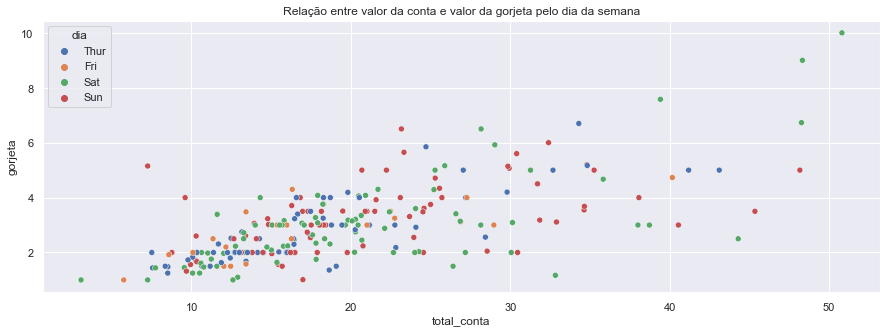

In [24]:
plt.figure(figsize=(15,5))
plt.title('Relação entre valor da conta e valor da gorjeta pelo dia da semana')
sns.scatterplot(x="total_conta", y="gorjeta", hue = 'dia', data=tips)
plt.show()

Visualizando os dados de forma separada em grade.

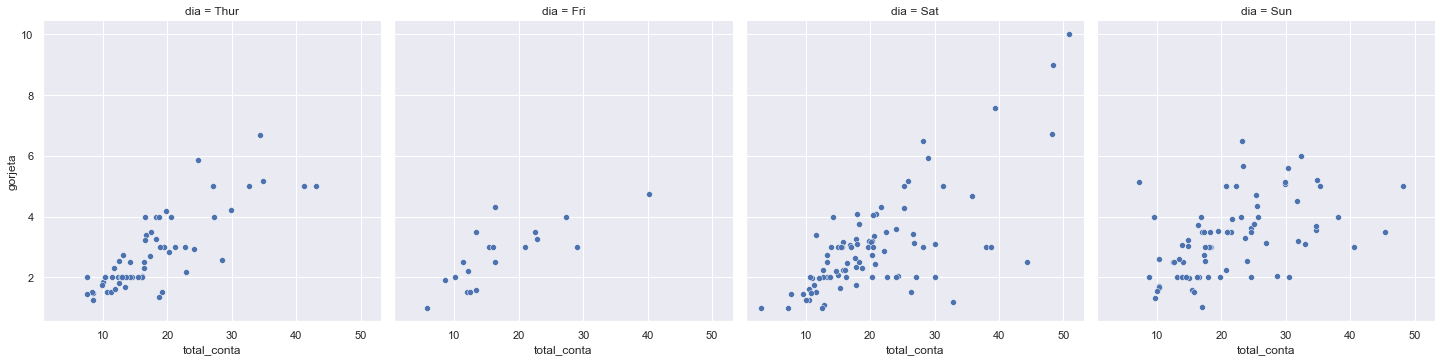

In [29]:
sns.relplot(x="total_conta", y="gorjeta", col = 'dia', data=tips)

- Observa-se que a correlação no dia de sábado é mais forte em relação aos outros dias.

Destacando a relação de homens e mulheres nos dados.

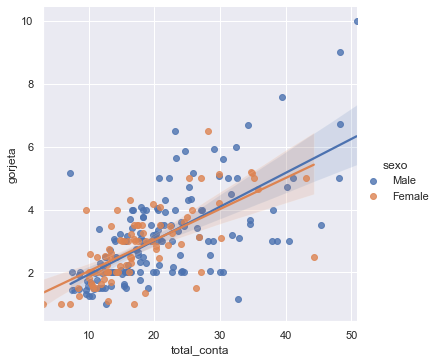

In [30]:
sns.lmplot(x='total_conta', y='gorjeta', hue='sexo', data=tips)

- Observa-se que as relas de regressão são muito similares, indicando a tendência já observada entre o valor da conta egorjeta para ambos os sexos.

Analisando os dados de gorjetas para quantidade de pessoas nas mesas.

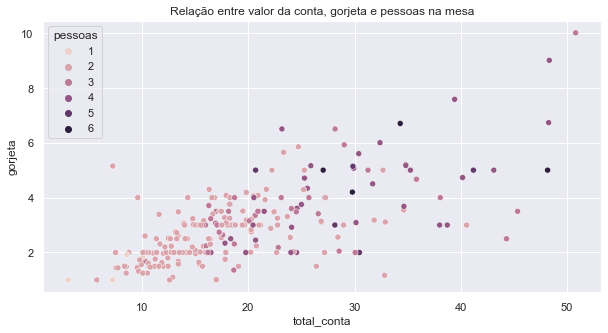

In [31]:
plt.figure(figsize=(10,5))
plt.title('Relação entre valor da conta, gorjeta e pessoas na mesa')
sns.scatterplot(x='total_conta', y='gorjeta', hue='pessoas', data=tips)
plt.show()

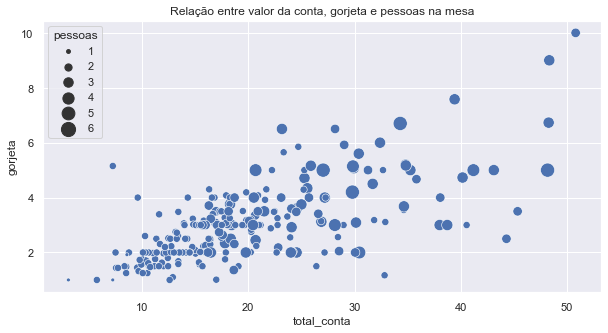

In [33]:
# gráfico de bolhas
plt.figure(figsize=(10,5))
plt.title('Relação entre valor da conta, gorjeta e pessoas na mesa')
sns.scatterplot(x='total_conta', y='gorjeta', size='pessoas', sizes=(15, 200), data=tips)
plt.show()

- As duas visualizações anteriores ajudam a ter uma visão geral, mas não facilitam fazer comparações precisas.

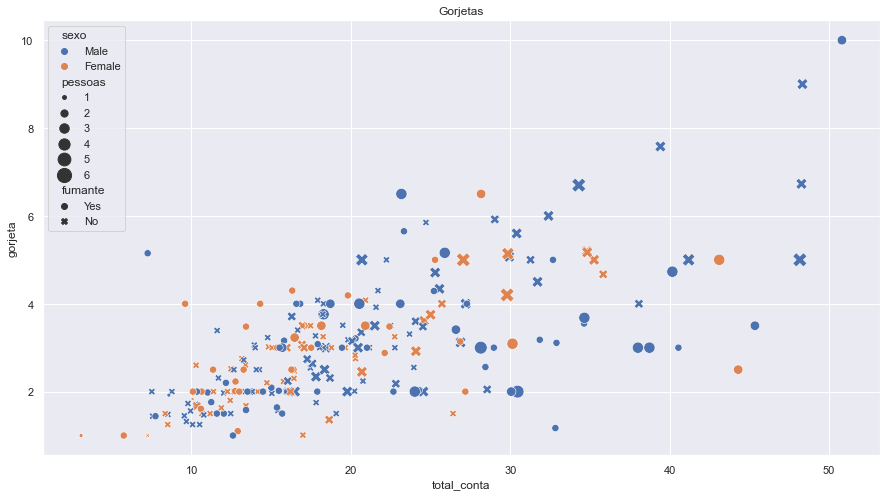

In [34]:
# Visualizando todas variáveis
plt.figure(figsize=(15,8))
plt.title('Gorjetas')
sns.scatterplot(x='total_conta', y='gorjeta', size='pessoas', hue='sexo', style ='fumante', sizes=(15,200), data=tips)
plt.show()

- Muitas informações plotadas não ajudam a dar o foco na análise, ficando poluído de informação.
- O que pode ser observado de forma geral que não fumantes costumam dar boas gorjetas.